In [53]:

import numpy as np
import math as mt
import cmath as cmt
import matplotlib.pyplot as plt

def init_waveform(x0,y0,sigma_x,sigma_y,k_x = 500,k_y =500,
                  n_x = 10000,x_min = -1,x_max = 1,
                  n_y = 10000,y_min = -1,y_max = 1):
    # initial 1D wave packet
    x = np.linspace(x_min,x_max,n_x)
    y = np.linspace(y_min,y_max,n_y)
    z = np.zeros((n_x,n_y),dtype=complex)
    norm = 1/(mt.sqrt(2*mt.pi)*sigma_x*sigma_y)
    test_norm = 0
    j = cmt.sqrt(-1)
    dx = (x_max - x_min)/n_x
    dy = (y_max - y_min)/n_y
    for i in range(1,n_x):
        for k in range(1,n_y):
            z[i,k] = cmt.exp(-0.5*((x[i]-x0)/sigma_x)**2 - 0.5*((y[k]-y0)/sigma_y)**2 - k_x*j*(x[i]-x0) - k_y*j*(y[k]-y0))
            z[i,k] *= norm
            test_norm += (np.real(z[i,k])**2 + np.imag(z[i,k]))*dx*dy
            if(i%1000 == 0 & k%1000 ==0):
                print('x pos: ',i,' y pos: ',k,' psi: ',z[i,k])
                
    print('norm: ',test_norm)
    return(z)

def V_r(x,y,V0 = 100,r0 = 0.1):
    # functional form of the potential barrier, height V0 and radius r0, centered at (0,0)
    r = mt.sqrt(x**2 + y**2)
    if r>r0:
        return(0)
    else:
        return(V0)
#np.seterr(all='ignore')


In [54]:
z = init_waveform(-0.5,0,0.05,0.05,200,200,1000,-1,1,1000)

norm:  99.80010000000034


In [59]:
V_r(0.01,0.05)

100

In [73]:
def waveform2D():
    t_max = 0.05
    x_max = 1
    y_max = 1
    x_min = -1
    y_min = -1
#dt = 1e-5
    m_max = int(5e4)
    dt = t_max/m_max
    n_x_max = 200
    n_y_max = 200
    dx = (x_max - x_min)/n_x_max
    dy = (y_max - y_min)/n_y_max
    k_x = -500
    k_y = 0
  
    x = np.linspace(x_min,x_max,n_x_max)
    y = np.linspace(y_min,y_max,n_y_max)

    z = init_waveform(-0.5,0,0.05,0.05,k_x,k_y,n_x_max,-1,1,n_y_max)
    R = np.real(z)
    I = np.imag(z)
    norm = mt.sqrt(np.sum(R**2 + I**2)*dx*dy)
    R /= norm
    I /= norm
    print('norm at step 0: ',np.sum(R**2)*dx+np.sum(I**2)*dx)

    dR = np.zeros((n_x_max,n_y_max))
    dI = np.zeros((n_x_max,n_y_max))

    plt.ion()
    fig = plt.figure()
    #plt.plot(x,P*dx)
    numImage = 0

    for m in range(0,m_max+1): # loop over time steps
        P = R**2 + I**2
        norm = mt.sqrt(np.sum(P)*dx*dy)
    
        if m%100 == 0: # update user info
            str1 = "On timestep: " + str(m)
            print(str1)
            print('norm: ',np.sum(P)*dx*dy)
            #S = np.sum(P*np.log(P*dx)*dx)
            #print('Entropy: ',S)
        if m%200 == 0: # save plot, calc transmittance and reflection
            fileNm = 'qmWave2Dtimestep' + str(numImage) + 'V1e5_r0pt1.png' 
            plt.close()
            #plt.ylim(0,0.06)
            plt.xlabel('x position')
            plt.ylabel('y position')
            #Tr = 100.0*np.sum(P[int(n_max/2)+1:n_max])*dx
            #Re = 100.0*np.sum(P[0:int(n_max/2)])*dx
            #plt.text(-0.5,0.05,'Transmitted: '+str(round(Tr,3))+' %')
            #plt.text(-0.5,0.045,'Reflected: '+str(round(Re,3))+' %')    
            plt.pcolormesh(x,y,P*dx*dy)
            plt.savefig(fileNm)
            print('saved ',fileNm)
            numImage += 1
        
        for i in range(0,n_x_max-1): # loop over x positions
            for k in range(0,n_y_max-1): # loop over x positions
                # Lapacian in 2D carteisian coordinates
                lapx_I = (I[i+1,k] + I[i-1,k] - 2*I[i,k])/dx**2 + (I[i,k+1] + I[i,k-1] - 2*I[i,k])/dy**2
                lapx_R = (R[i+1,k] + R[i-1,k] - 2*R[i,k])/dx**2 + (R[i,k+1] + R[i,k-1] - 2*R[i,k])/dx**2
                # leapfrog to update the real and imaginary parts using schrodinger's equation
                dR[i,k] =  dt*(0.5*lapx_I + V_r(x[i],y[k],1e5,0.1)*I[i,k]) 
                dI[i,k] = -dt*(0.5*lapx_R + V_r(x[i],y[k],1e5,0.1)*R[i,k])
        for i in range(0,n_x_max-1): # loop over x positions
            for k in range(0,n_y_max-1): # loop over x positions
            # update for next time step
                R[i,k] += dR[i,k]
                I[i,k] += dI[i,k] 
                R[i,k] /= norm
                I[i,k] /= norm
   


#plt.plot(x,P*dx)
plt.show()
        
#print(np.sum(P)*dx)
#print('Transmission: ',np.sum(P[int(n_max/2)+1:n_max])*dx)
#print('Reflection: ',np.sum(P[0:int(n_max/2)])*dx)


norm:  99.00250000773543
norm at step 0:  100.0
On timestep: 0
norm:  0.9999999999999998
saved  qmWave2Dtimestep0V1e5_r0pt1.png
On timestep: 100
norm:  1.000051621661941
On timestep: 200
norm:  1.0000516594340954
saved  qmWave2Dtimestep1V1e5_r0pt1.png
On timestep: 300
norm:  1.0000516972564641
On timestep: 400
norm:  1.0000517351291378
saved  qmWave2Dtimestep2V1e5_r0pt1.png
On timestep: 500
norm:  1.0000517730522072
On timestep: 600
norm:  1.0000518110257621
saved  qmWave2Dtimestep3V1e5_r0pt1.png
On timestep: 700
norm:  1.000051849049893
On timestep: 800
norm:  1.0000518871246915
saved  qmWave2Dtimestep4V1e5_r0pt1.png
On timestep: 900
norm:  1.0000519252502478
On timestep: 1000
norm:  1.0000519634266536
saved  qmWave2Dtimestep5V1e5_r0pt1.png
On timestep: 1100
norm:  1.000052001654
On timestep: 1200
norm:  1.000052039932379
saved  qmWave2Dtimestep6V1e5_r0pt1.png
On timestep: 1300
norm:  1.0000520782618814
On timestep: 1400
norm:  1.0000521166426006
saved  qmWave2Dtimestep7V1e5_r0pt1.png

KeyboardInterrupt: 

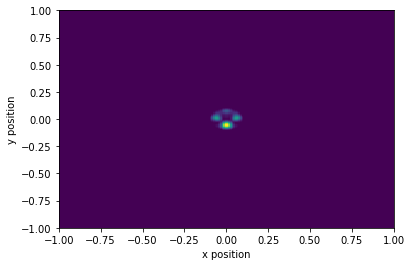

In [74]:
waveform2D()

In [75]:
import os
import cv2


fileList = []
for fileNm in os.listdir('.'):
    if fileNm.endswith('.png'):
        fileList.append(fileNm)
        img = cv2.imread(fileNm)
        height,width,layers = img.shape
        size = (width,height)

video = cv2.VideoWriter('waveform_2d_v1e5_r0pt1.avi',0,15,size)
print(fileList)
for i in range(0,200):
    print(fileList[i])
    video.write(cv2.imread('qmWave2Dtimestep'+str(i)+'V1e5_r0pt1.png'))
video.release()

['qmWave2Dtimestep0V1e5_r0pt1.png', 'qmWave2Dtimestep10V1e5_r0pt1.png', 'qmWave2Dtimestep11V1e5_r0pt1.png', 'qmWave2Dtimestep12V1e5_r0pt1.png', 'qmWave2Dtimestep13V1e5_r0pt1.png', 'qmWave2Dtimestep14V1e5_r0pt1.png', 'qmWave2Dtimestep15V1e5_r0pt1.png', 'qmWave2Dtimestep16V1e5_r0pt1.png', 'qmWave2Dtimestep17V1e5_r0pt1.png', 'qmWave2Dtimestep18V1e5_r0pt1.png', 'qmWave2Dtimestep19V1e5_r0pt1.png', 'qmWave2Dtimestep1V1e5_r0pt1.png', 'qmWave2Dtimestep20V1e5_r0pt1.png', 'qmWave2Dtimestep21V1e5_r0pt1.png', 'qmWave2Dtimestep22V1e5_r0pt1.png', 'qmWave2Dtimestep23V1e5_r0pt1.png', 'qmWave2Dtimestep24V1e5_r0pt1.png', 'qmWave2Dtimestep25V1e5_r0pt1.png', 'qmWave2Dtimestep26V1e5_r0pt1.png', 'qmWave2Dtimestep27V1e5_r0pt1.png', 'qmWave2Dtimestep28V1e5_r0pt1.png', 'qmWave2Dtimestep29V1e5_r0pt1.png', 'qmWave2Dtimestep2V1e5_r0pt1.png', 'qmWave2Dtimestep30V1e5_r0pt1.png', 'qmWave2Dtimestep31V1e5_r0pt1.png', 'qmWave2Dtimestep32V1e5_r0pt1.png', 'qmWave2Dtimestep33V1e5_r0pt1.png', 'qmWave2Dtimestep34V1e5_r0pt1.

IndexError: list index out of range

In [76]:
98.1*(300**2)/6.67e-11

1.323688155922039e+17

In [77]:
2*6.67e-11*1.3e17/(3e8)**2

1.926888888888889e-10

In [78]:
1.3e17/(1.33*mt.pi*(300**3))

1152333199.7742352